In [2]:
import pandas as pd
import numpy as np
from random import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

# Perceptron

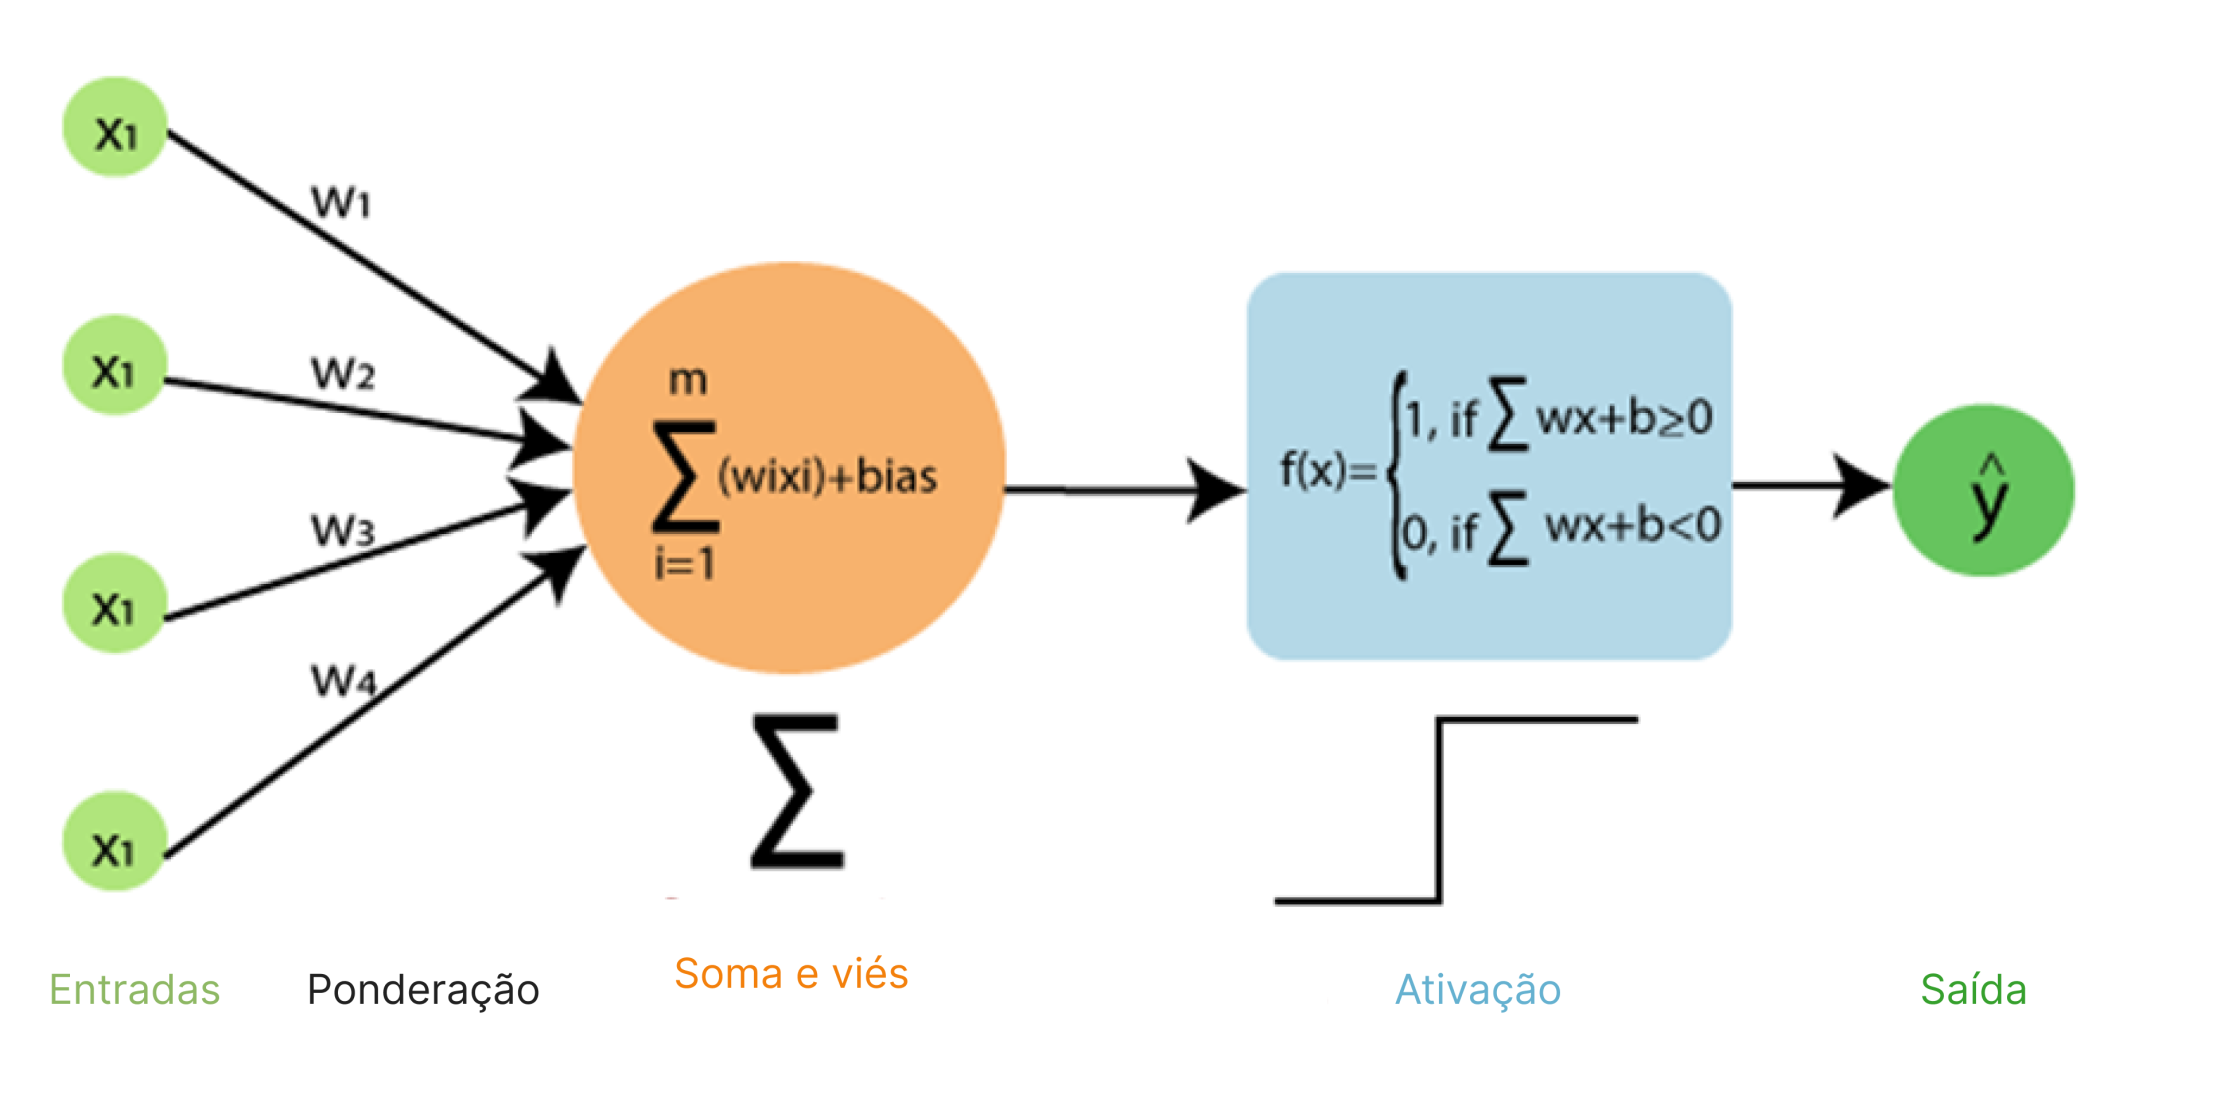

In [3]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


#### Python puro

In [27]:
'''step 1: Inicializar pesos e bias'''

D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

''' step 2: Para cada amostra aleatória:
    a) Calcular a saida;
    b) Calcular o erro;
    c) Atualizar os pesos;
    d) Atualizar os bias.
'''
l_rate = 1e-2

for step in range(101):
    cost = 0 # inicializando com um custo zero
    for xn, yn in zip(x, y):
        y_pred = sum([xi*wi for xi, wi in zip(xn, w)]) + b
        y_pred = 1 if y_pred > 0 else 0 # função de ativação
        erro = yn - y_pred
        w = [wi + l_rate * erro * xi for xi, wi in zip(xn, w)]
        b = b + l_rate * erro
        cost += erro**2 # calculando o custo
    if step % 10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w:', w)
print('b:', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: 1
step 10: 1
step 20: 1
step 30: 1
step 40: 2
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [np.float64(0.01174792048708414), np.float64(0.20764042924737408)]
b: -0.21825441905693177
y_pred: [-0.21825442 -0.01061399 -0.2065065   0.00113393]


#### Numpy

In [28]:
'''step 1: Inicializar pesos e bias'''
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

''' step 2: Para cada amostra aleatória:
    a) Calcular a saida;
    b) Calcular o erro;
    c) Atualizar os pesos;
    d) Atualizar os bias.
'''
l_rate = 1e-2

for step in range(101):
    cost = 0 # inicializando com um custo zero
    for xn, yn in zip(x, y):
        y_pred = np.dot(xn, w) + b
        y_pred = np.where(y_pred > 0, 1, 0) # função de ativação
        erro = yn - y_pred
        w = w + l_rate * np.dot(erro, xn)
        b = b + l_rate * erro
        cost += erro**2 # calculando o custo

    if step % 10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w:', w)
print('b:', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: 3
step 10: 3
step 20: 3
step 30: 3
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.01788608 0.01297593]
b: -0.0290387878303427
y_pred: [-0.02903879 -0.01606286 -0.0111527   0.00182323]


In [29]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)

(100, 2) (100,)
